# Here are some steps I think we can use 
### Check centering and scaling video die laaste deel

1 missing values </br>
2 Dummy values </br>
3 Create a Pipeline with steps </br>
4 Paramenters where we change the values of the things in the steps (like knn n_neigbors)</br>
5 X_train y_train etc split </br>
6 GridSearchCV (pipeline, param_grid)</br>
7 cv.fit (X_train, y_train)</br>
8 y_pred = cv.predict(X_test)</br>
9 Evaluate the predictions </br>
10 Go back and chnage our (Scaler or Normalizer, Regression model, split for the data,  parameter or remove certain colomns </br>
11 Start again ar step 3</br>

#### Types of regressions we can use
Logistic Regression </br>
Naive Bayes</br>
K-Nearest Neighbors</br>
Decision Tree</br>
Support Vector Machines</br>
Random Forest </br>
Stochastic Gradient Descent</br>
Here is a website with all 7 their advantages, disadvantages and python code https://analyticsindiamag.com/7-types-classification-algorithms/ </br>
Op die website het hulle n table wat al die regressions uit een le en hoe akkuraat dit was, Ek dink ons kan mik om ook iets soos dit om te stel, gaan check ook asb die power point template uit en laat weet wat jy dink </br>

In [30]:
import pandas as pd
import seaborn as sns

In [31]:
data = pd.read_csv("SalesDirect.csv")

In [32]:
data

,Sales,Purchase,Month,AgeInMonths,ProfileInMonths,Subscribed,NumPrevOrders,AvgSpend,POSR,OPR,...,ShippingOption,Shipping,Country,Platform,Payment,DayOfWeek,Ad_1,Ad_2,Ad_3,SocialMedia
0,519.91,Yes,November,450,22,None,32,159.04,1.3,0.60,...,Express,Paid,Germany,Computer,PayPal,Saturday,No,No,No,None
1,620.48,Yes,April,511,29,None,22,358.26,6.5,0.95,...,Premium,Paid,South Africa,Computer,EFT,Monday,No,No,Yes,None
2,545.22,Yes,July,410,28,None,31,351.28,3.1,0.98,...,Premium,Paid,China,Computer,EFT,Sunday,No,No,Yes,None
3,438.87,Yes,September,451,1,None,9,255.13,2.6,0.77,...,Express,Paid,China,Computer,Credit Card,Wednesday,No,No,Yes,None
4,0.00,No,January,402,7,None,8,262.69,4.8,0.61,...,NaN,NaN,South Africa,Android,NaN,Wednesday,Yes,No,No,Facebook
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,507.73,Yes,March,434,20,Daily,14,252.58,7.4,0.95,...,Premium,Paid,South Africa,iOS,Account Credit,Saturday,Yes,Yes,No,Twitter
149996,465.05,Yes,March,404,7,None,9,442.57,3.1,0.85,...,Express,Paid,United States,Computer,PayPal,Thursday,Yes,No,Yes,Twitter
149997,530.91,Yes,June,411,31,Monthly,27,168.55,5.4,0.50,...,Standard,Free,South Africa,Computer,Credit Card,Friday,Yes,Yes,Yes,Instagram
149998,0.00,No,February,510,16,None,9,339.60,0.8,0.88,...,NaN,NaN,South Africa,iOS,NaN,Sunday,No,No,Yes,None


In [4]:
import os
os.listdir()

['SalesDirect.csv',
 'DataScienceTemplate.pptx',
 '.ipynb_checkpoints',
 'RepoTest.txt',
 'DataScienceFAS.ipynb',
 '.git']

In [5]:
data.shape


(150000, 22)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 22 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Sales            150000 non-null  float64
 1   Purchase         150000 non-null  object 
 2   Month            150000 non-null  object 
 3   AgeInMonths      150000 non-null  int64  
 4   ProfileInMonths  150000 non-null  int64  
 5   Subscribed       150000 non-null  object 
 6   NumPrevOrders    150000 non-null  int64  
 7   AvgSpend         150000 non-null  float64
 8   POSR             150000 non-null  float64
 9   OPR              150000 non-null  float64
 10  Online           150000 non-null  int64  
 11  Discount         91464 non-null   float64
 12  ShippingOption   91464 non-null   object 
 13  Shipping         91464 non-null   object 
 14  Country          150000 non-null  object 
 15  Platform         150000 non-null  object 
 16  Payment          91464 non-null   obje

In [7]:
data.isna().sum()

Sales                  0
Purchase               0
Month                  0
AgeInMonths            0
ProfileInMonths        0
Subscribed             0
NumPrevOrders          0
AvgSpend               0
POSR                   0
OPR                    0
Online                 0
Discount           58536
ShippingOption     58536
Shipping           58536
Country                0
Platform               0
Payment            58536
DayOfWeek              0
Ad_1                   0
Ad_2                   0
Ad_3                   0
SocialMedia            0
dtype: int64

 Thus, our data is importet correctly and we can go ahead and start familiarizing ourselves with the data


# Firstly, we notice that there are null values. 
#### We first have to get rid of these values and replace them with some other value so that we can actually perform regressions and interpret the data

We will try multiple ways of replacing the data and see which is the most effective

In [8]:
df_with_null = data[["Discount","ShippingOption", "Shipping", "Payment"]]
df_all_null = df_with_null.isnull()
df_all_null

In [10]:
condi = df_all_null['Discount'].values == True
df_all_null  = df_all_null[condi]
any_false = df_all_null['ShippingOption'].values == False
any_ShipOp = df_all_null[any_false]
any_false = df_all_null['Shipping'].values == False
any_Ship = df_all_null[any_false]
any_false = df_all_null['Payment'].values == False
any_Pay = df_all_null[any_false]

In [12]:
any_ShipOp

,Discount,ShippingOption,Shipping,Payment


In [13]:
any_Ship

,Discount,ShippingOption,Shipping,Payment


In [14]:
any_Pay

,Discount,ShippingOption,Shipping,Payment


# This changes our approach to the missing values

What we just showed is that all of the missing values occur in the same rows. Meaning that is Discount is missing then ShippingOption	Shipping	Payment is also missing. Hence this might be for some reason (like the website did not track the data yet or not). It might be worth it to investigate why this is.

In [44]:
df_is_null = data[data.isna().any(axis=1)]
a = df_is_null['Sales'].sum() 
a

0.0

# We found the problem

It is not that the values weren't recorded, the values do not exist since there was not any Sales made for these clients. Thus those values can not possible exist. This means that we can change all of the NaN to some value indicating that a sale has not yet taken place

# //TODO change the data now to some value for it 

## // Change the null values to something

Here follows the basic format to getting dummie values and drop unneccasary tables

In [43]:
df = data

df_dum = pd.get_dummies(df)
df_dum = df_dum.drop(['Ad_1_No','Ad_2_No','Ad_3_No','Purchase_No', 'SocialMedia_None','DayOfWeek_Sunday'], axis=1)
df_dum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 64 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Sales                    150000 non-null  float64
 1   AgeInMonths              150000 non-null  int64  
 2   ProfileInMonths          150000 non-null  int64  
 3   NumPrevOrders            150000 non-null  int64  
 4   AvgSpend                 150000 non-null  float64
 5   POSR                     150000 non-null  float64
 6   OPR                      150000 non-null  float64
 7   Online                   150000 non-null  int64  
 8   Discount                 91464 non-null   float64
 9   Purchase_Yes             150000 non-null  uint8  
 10  Month_April              150000 non-null  uint8  
 11  Month_August             150000 non-null  uint8  
 12  Month_December           150000 non-null  uint8  
 13  Month_February           150000 non-null  uint8  
 14  Mont

# Since we will be doing we can drop the sales column

We are only interested in wheter the client made a purchase or not and not in how big the purchase was

In [19]:
df = df.drop(columns=['Sales'])

,Purchase,Month,AgeInMonths,ProfileInMonths,Subscribed,NumPrevOrders,AvgSpend,POSR,OPR,Online,...,ShippingOption,Shipping,Country,Platform,Payment,DayOfWeek,Ad_1,Ad_2,Ad_3,SocialMedia
0,1,November,450,22,0,32,159.04,1.3,0.60,36,...,Express,Paid,Germany,2,PayPal,Saturday,0,0,0,0
1,1,April,511,29,0,22,358.26,6.5,0.95,68,...,Premium,Paid,South Africa,2,EFT,Monday,0,0,1,0
2,1,July,410,28,0,31,351.28,3.1,0.98,67,...,Premium,Paid,China,2,EFT,Sunday,0,0,1,0
3,1,September,451,1,0,9,255.13,2.6,0.77,52,...,Express,Paid,China,2,Credit Card,Wednesday,0,0,1,0
4,0,January,402,7,0,8,262.69,4.8,0.61,25,...,NaN,NaN,South Africa,0,NaN,Wednesday,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,1,March,434,20,3,14,252.58,7.4,0.95,55,...,Premium,Paid,South Africa,1,Account Credit,Saturday,1,1,0,3
149996,1,March,404,7,0,9,442.57,3.1,0.85,36,...,Express,Paid,United States,2,PayPal,Thursday,1,0,1,3
149997,1,June,411,31,1,27,168.55,5.4,0.50,62,...,Standard,Free,South Africa,2,Credit Card,Friday,1,1,1,1
149998,0,February,510,16,0,9,339.60,0.8,0.88,42,...,NaN,NaN,South Africa,1,NaN,Sunday,0,0,1,0


#  Below some graphs to get basic idea, don't know if it is helpfull

<AxesSubplot:>

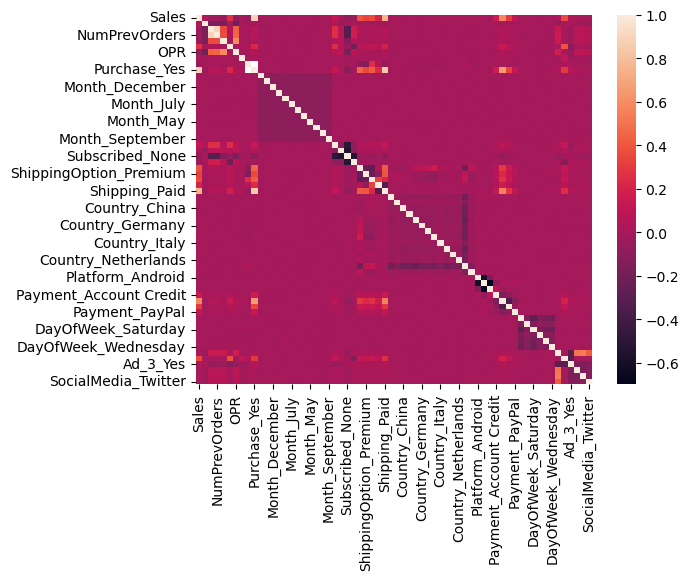

In [48]:
sns.heatmap(df.corr())

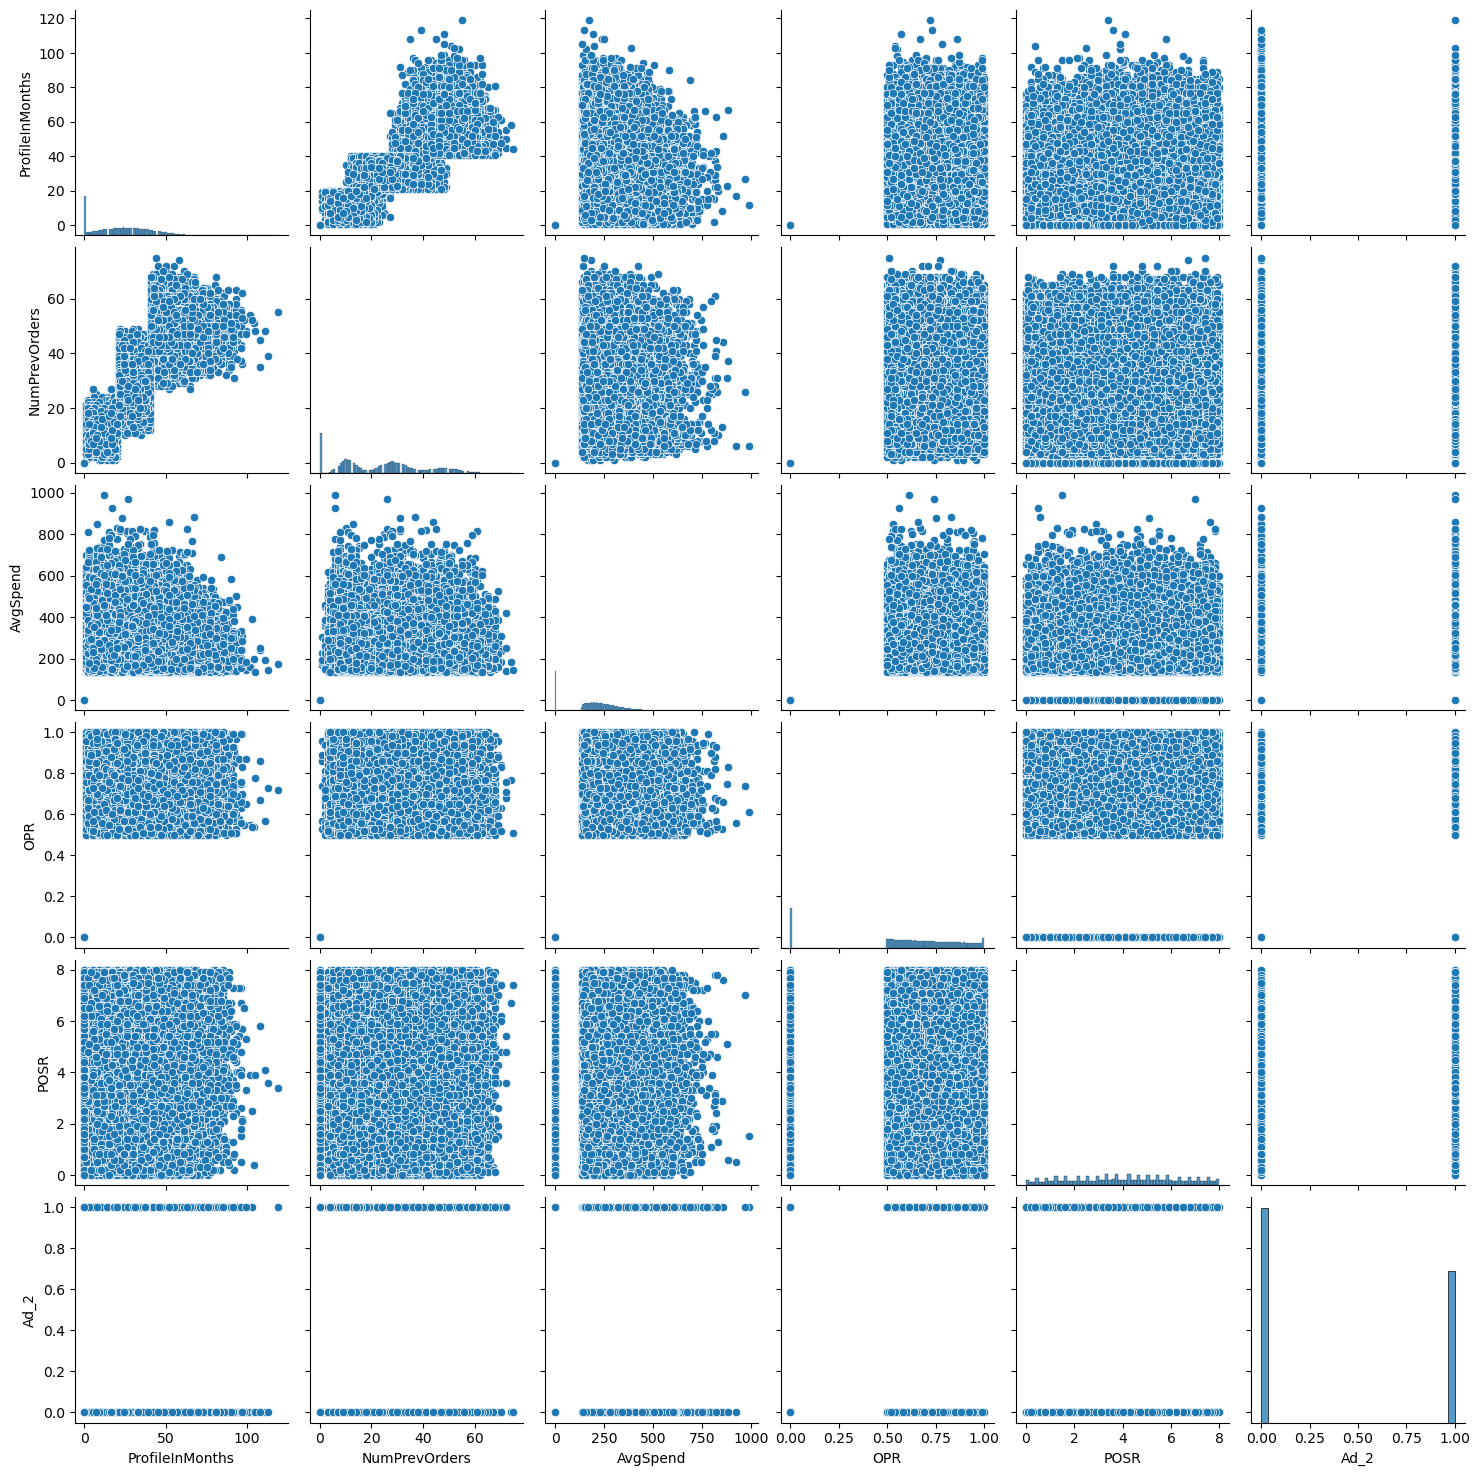

In [22]:
my_Boston=df[['ProfileInMonths','NumPrevOrders' ,'AvgSpend','OPR','POSR','Ad_2']]
sns.pairplot(my_Boston)

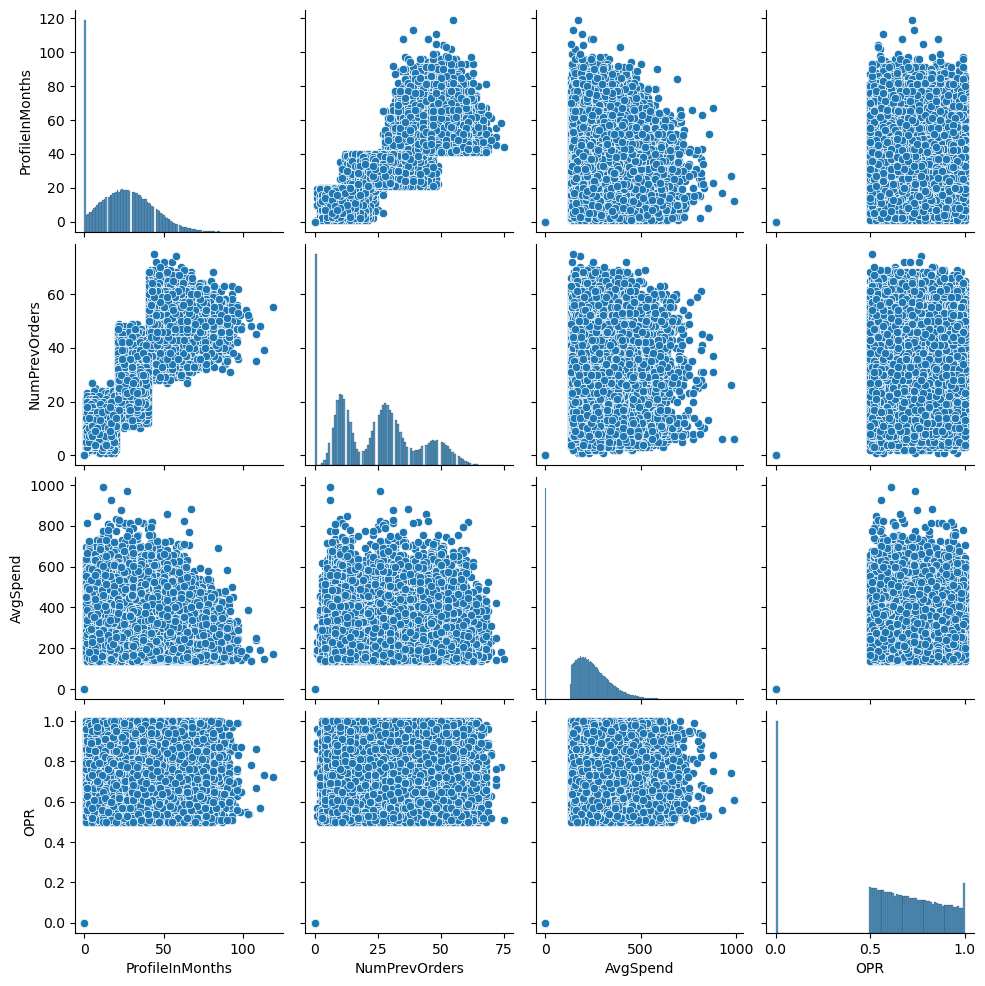

In [23]:
my_Boston=df[['ProfileInMonths','NumPrevOrders' ,'AvgSpend','OPR']]
sns.pairplot(my_Boston)

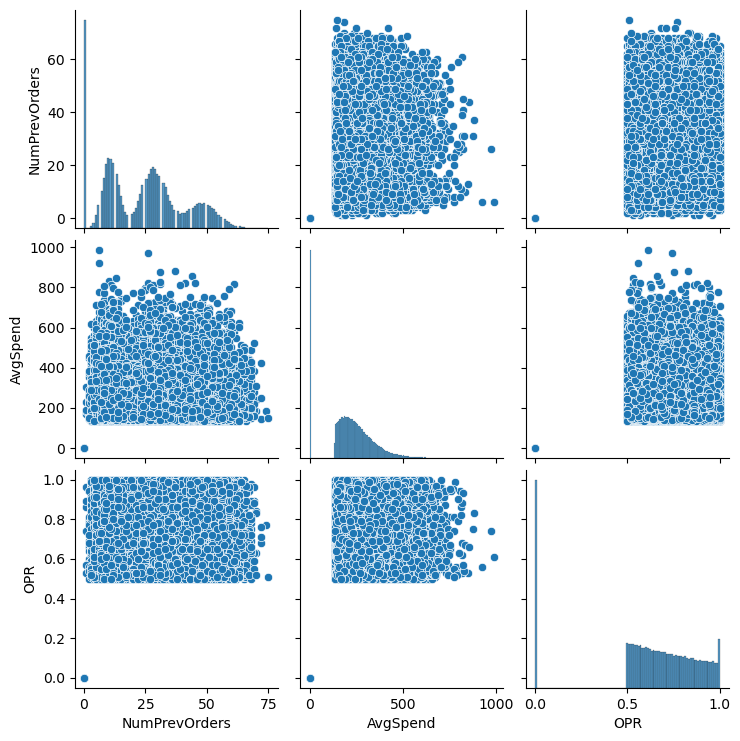

In [24]:
my_Boston=df[['NumPrevOrders' ,'AvgSpend','OPR']]
sns.pairplot(my_Boston)

In [45]:
my_Boston=df[['NumPrevOrders' ,'ProfileInMonths']]
my_Boston.corr()

,NumPrevOrders,ProfileInMonths
NumPrevOrders,1.000000,0.897298
ProfileInMonths,0.897298,1.000000


In [47]:
df_dum.corr()

,Sales,AgeInMonths,ProfileInMonths,NumPrevOrders,AvgSpend,POSR,OPR,Online,Discount,Purchase_Yes,...,DayOfWeek_Saturday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday,Ad_1_Yes,Ad_2_Yes,Ad_3_Yes,SocialMedia_Facebook,SocialMedia_Instagram,SocialMedia_Twitter
Sales,1.000000,0.051172,-0.021887,-0.016200,-0.048041,0.270011,-0.081219,0.002778,-0.045123,0.881205,...,0.003837,-0.005303,0.002275,-0.006819,0.005564,0.353300,0.043738,0.001869,0.002671,0.003773
AgeInMonths,0.051172,1.000000,-0.164498,-0.160446,-0.169039,0.003903,-0.207862,0.001170,0.002259,-0.028342,...,0.000229,0.002565,0.001242,-0.000450,-0.052253,0.000326,0.013431,-0.023676,-0.028133,-0.024603
ProfileInMonths,-0.021887,-0.164498,1.000000,0.897298,0.351685,0.034818,0.435232,0.009479,0.007647,0.071178,...,0.000167,0.000622,-0.003057,0.000529,0.140469,0.009565,-0.047445,0.070428,0.075558,0.058350
NumPrevOrders,-0.016200,-0.160446,0.897298,1.000000,0.358272,0.035114,0.444086,0.006458,0.008634,0.075012,...,0.000723,-0.000705,-0.002852,-0.000025,0.148871,0.011704,-0.048335,0.076625,0.079781,0.059898
AvgSpend,-0.048041,-0.169039,0.351685,0.358272,1.000000,0.004372,0.586643,0.006840,-0.002299,0.041434,...,0.001489,0.002411,-0.004084,0.000512,0.137627,0.000797,-0.040097,0.070611,0.075154,0.053927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ad_2_Yes,0.353300,0.000326,0.009565,0.011704,0.000797,0.389571,0.002560,0.104693,0.039387,0.300003,...,-0.001550,-0.003069,-0.001435,0.000761,0.005962,1.000000,-0.299658,0.007800,-0.000866,0.001870
Ad_3_Yes,0.043738,0.013431,-0.047445,-0.048335,-0.040097,-0.117034,-0.054170,-0.030456,0.003101,0.068075,...,0.001363,0.000396,0.002481,-0.006561,-0.296651,-0.299658,1.000000,-0.151553,-0.159634,-0.119873
SocialMedia_Facebook,0.001869,-0.023676,0.070428,0.076625,0.070611,0.006236,0.088335,-0.002211,0.005536,0.015840,...,0.002748,-0.001999,-0.001572,0.001688,0.501710,0.007800,-0.151553,1.000000,-0.166311,-0.127487
SocialMedia_Instagram,0.002671,-0.028133,0.075558,0.079781,0.075154,0.001749,0.092663,-0.000507,0.001023,0.019767,...,-0.001921,0.003168,0.001975,-0.001954,0.539246,-0.000866,-0.159634,-0.166311,1.000000,-0.137025
